<a href="https://colab.research.google.com/github/astha77-bot/Elbridge-International-Hackathon/blob/master/Elbridgebot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
#May be try starts with, cuz some of the replies are like 'male-ish'

def get_gender(gender):
    if gender.lower() == 'm' or gender.lower() == 'male':
        return 'M'
    elif gender.lower() == 'f' or gender.lower() == 'female':
        return 'F'
    else:
        return 'other'

In [ ]:
df = pd.read_csv('survey.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df['gender_clean'] = df['Gender'].apply(get_gender)

In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

Timestamp 1246
Age 53
Gender 49
Country 48
state 45
self_employed 2
family_history 2
treatment 2
work_interfere 4
no_employees 6
remote_work 2
tech_company 2
benefits 3
care_options 3
wellness_program 3
seek_help 3
anonymity 3
leave 5
mental_health_consequence 3
phys_health_consequence 3
coworkers 3
supervisor 3
mental_health_interview 3
phys_health_interview 3
mental_vs_physical 3
obs_consequence 2
comments 160
gender_clean 3


In [ ]:
df.drop(columns=[
                 'Timestamp',
                 'Country',
                 'state',
                 'comments'
], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [ ]:
df.drop(columns=['Gender'], inplace=True)

In [ ]:
df['gender_clean'].value_counts()

M        971
F        236
other     52
Name: gender_clean, dtype: int64

In [ ]:
cat_cols = []

for col in df.columns:
  try:
    df[col] = pd.to_numeric(df[col])
  except:
    print(col)
    print(df[col].unique())
    cat_cols.append(col)

self_employed
[nan 'Yes' 'No']
family_history
['No' 'Yes']
treatment
['Yes' 'No']
work_interfere
['Often' 'Rarely' 'Never' 'Sometimes' nan]
no_employees
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
remote_work
['No' 'Yes']
tech_company
['Yes' 'No']
benefits
['Yes' "Don't know" 'No']
care_options
['Not sure' 'No' 'Yes']
wellness_program
['No' "Don't know" 'Yes']
seek_help
['Yes' "Don't know" 'No']
anonymity
['Yes' "Don't know" 'No']
leave
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_health_consequence
['No' 'Maybe' 'Yes']
phys_health_consequence
['No' 'Yes' 'Maybe']
coworkers
['Some of them' 'No' 'Yes']
supervisor
['Yes' 'No' 'Some of them']
mental_health_interview
['No' 'Yes' 'Maybe']
phys_health_interview
['Maybe' 'No' 'Yes']
mental_vs_physical
['Yes' "Don't know" 'No']
obs_consequence
['No' 'Yes']
gender_clean
['F' 'M' 'other']


In [ ]:
df['no_employees']

0                 6-25
1       More than 1000
2                 6-25
3               26-100
4              100-500
             ...      
1254            26-100
1255            26-100
1256    More than 1000
1257           100-500
1258            26-100
Name: no_employees, Length: 1259, dtype: object

In [ ]:
cat_cols.remove('work_interfere')

In [ ]:
data = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
data

,Age,work_interfere,self_employed_Yes,family_history_Yes,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes,gender_clean_M,gender_clean_other
0,37,Often,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0
1,44,Rarely,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,32,Rarely,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0
3,31,Often,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0
4,31,Never,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,NaN,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1255,32,Often,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0
1256,34,Sometimes,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
1257,46,NaN,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0


In [ ]:
df.isnull().sum()

Age                            0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
gender_clean                   0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [ ]:
label_map = {
    'Never':0,
    'Rarely':1,
    'Sometimes':2,
    'Often':3
}

In [ ]:
data['target'] = data['work_interfere'].map(label_map)

In [ ]:
data['target'].value_counts()

2    465
0    213
1    173
3    144
Name: target, dtype: int64

In [ ]:
data.drop(columns=['work_interfere'], inplace=True)

In [ ]:
X, y = data.drop(columns=['target']), data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

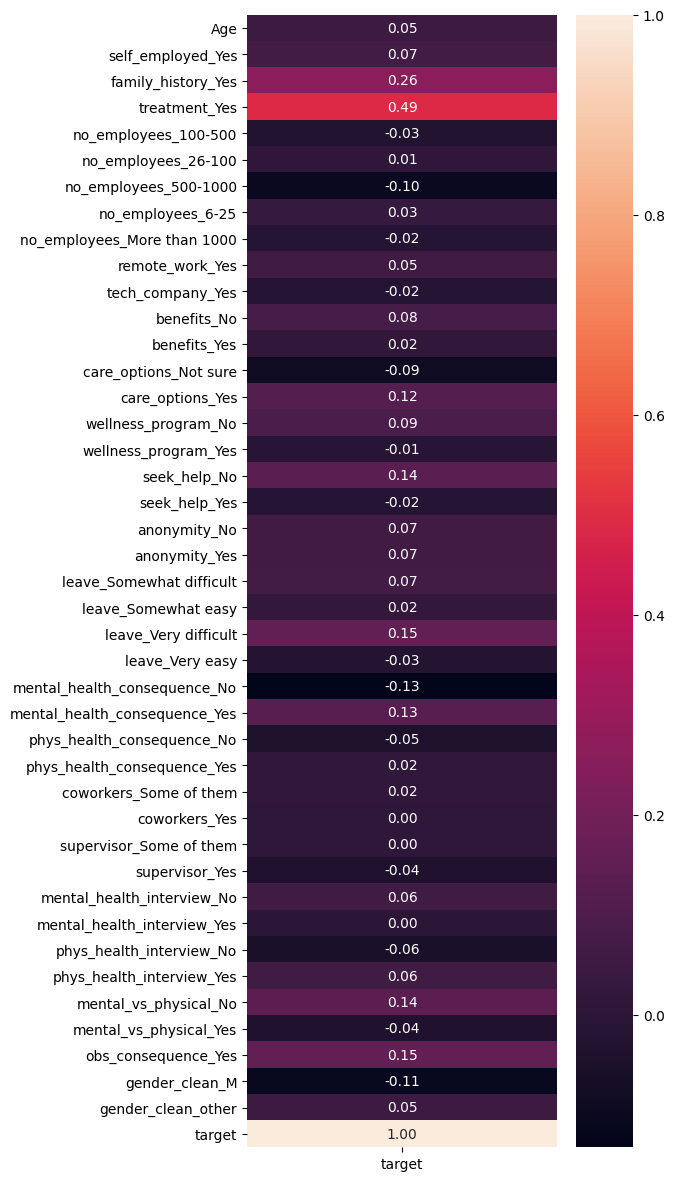

In [ ]:
plt.figure(figsize=(5, 15), dpi=100)
sns.heatmap(data.corr()[['target']], annot=True, fmt='.2f')

In [ ]:
corr_df = pd.DataFrame(data.corr())

In [ ]:
corr_df['target_abs'] = corr_df['target'].abs()

In [ ]:
top_cols = corr_df['target_abs'].sort_values(ascending=False).head(6).index

In [ ]:
top_cols = list(top_cols[1:])

In [ ]:
top_cols

In [ ]:
top_cols

In [ ]:
top_cols

['treatment_Yes',
 'family_history_Yes',
 'obs_consequence_Yes',
 'leave_Very difficult',
 'mental_vs_physical_No']

In [ ]:
X_train[top_cols]

,treatment_Yes,family_history_Yes,obs_consequence_Yes,leave_Very difficult,mental_vs_physical_No
200,1,1,0,0,0
395,0,0,0,0,0
254,0,0,0,0,0
1242,1,0,0,0,0
715,1,0,0,0,0
...,...,...,...,...,...
766,1,1,0,0,1
1150,1,0,1,0,0
1052,1,1,0,0,1
88,1,0,1,0,1


In [ ]:
model.fit(X_train[top_cols], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = model.predict(X_test[top_cols])

In [ ]:
len(X.columns)

42

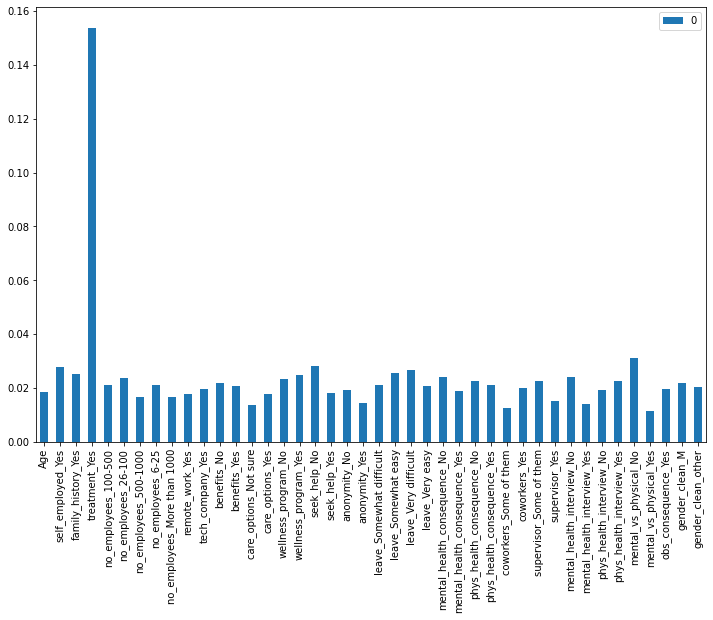

In [ ]:
pd.DataFrame(model.feature_importances_, index=X.columns).plot(kind='bar', figsize=(12,8))

In [ ]:
cat_cols

['self_employed',
 'family_history',
 'treatment',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'gender_clean']

In [ ]:
top_features

NameError: ignored

In [ ]:
df['no_employees'].value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.79      0.62        42
           1       0.00      0.00      0.00        35
           2       0.55      0.76      0.64        93
           3       0.00      0.00      0.00        29

    accuracy                           0.52       199
   macro avg       0.26      0.39      0.31       199
weighted avg       0.36      0.52      0.43       199



In [ ]:
model_full = XGBClassifier()

In [ ]:
model_full.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions_full = model_full.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions_full))

              precision    recall  f1-score   support

           0       0.46      0.55      0.50        42
           1       0.20      0.06      0.09        35
           2       0.52      0.75      0.62        93
           3       0.20      0.03      0.06        29

    accuracy                           0.48       199
   macro avg       0.35      0.35      0.32       199
weighted avg       0.41      0.48      0.42       199



In [ ]:
top_cols.insert(0,'gender_other')
top_cols.insert(0,'gender_M')
top_cols.insert(0,'age')

In [ ]:

top_cols

['age',
 'gender_M',
 'gender_other',
 'treatment_Yes',
 'family_history_Yes',
 'obs_consequence_Yes',
 'leave_Very difficult',
 'mental_vs_physical_No']

In [ ]:
top_cols = ['Age',
 'gender_clean_M',
 'gender_clean_other',
 'treatment_Yes',
 'family_history_Yes',
 'obs_consequence_Yes',
 'leave_Very difficult',
 'mental_vs_physical_No']

In [ ]:
XGBClassifier.fit(X[top_cols], y)

TypeError: ignored

In [ ]:
X

,Age,self_employed_Yes,family_history_Yes,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes,gender_clean_M,gender_clean_other
0,37,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0
1,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,32,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0
3,31,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0
4,31,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1253,36,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1255,32,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0
1256,34,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
